In [25]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import matplotlib.pylab as plt
%matplotlib inline

import numpy as np
np.random.seed(0)

In [26]:
(X_train, y_train) , (X_test , y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

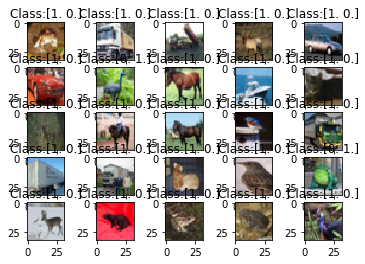

In [24]:
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx])
    plt.title('Class:{}'.format(y_train[idx]))

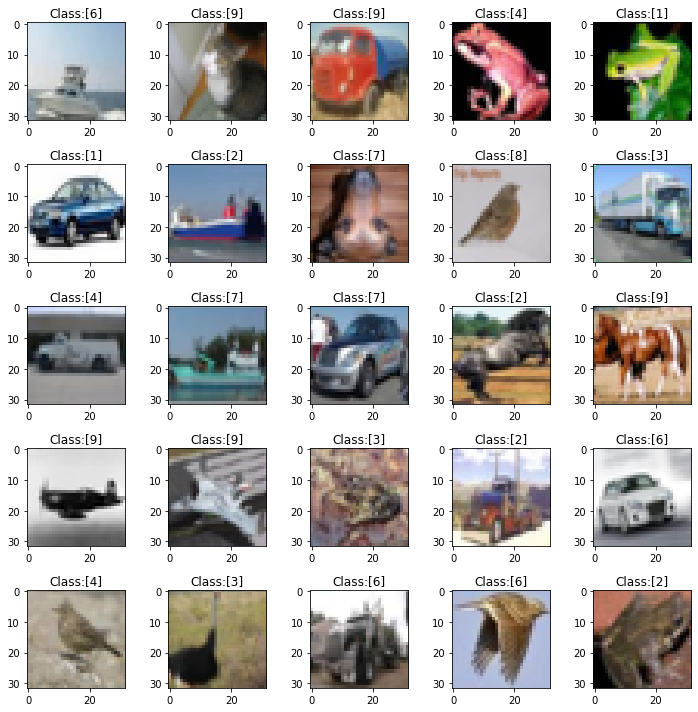

In [28]:
fig = plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx+100],cmap='gray',interpolation='none')
    plt.title('Class:{}'.format(y_train[idx]))
plt.tight_layout()

In [30]:
img_rows,img_cols = X_train.shape[1], X_train.shape[2]


num_channels = 3
X_train = X_train.reshape(X_train.shape[0] ,img_rows,img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0] ,img_rows,img_cols, num_channels)
input_shape = (img_rows,img_cols,num_channels)

X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [31]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [32]:
if len(y_train.shape)==2:
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

if len(y_train.shape)==1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train,num_classes)
    y_test = to_categorical(y_test,num_classes)



In [33]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
             
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
            
    Flatten(),
    

    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')
    
              
             ])

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=10, 
    verbose=2,
    validation_data=(X_test , y_test)
    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 121s - loss: 1.1897 - accuracy: 0.5812 - val_loss: 1.1163 - val_accuracy: 0.6086
Epoch 2/10
 - 118s - loss: 1.0896 - accuracy: 0.6155 - val_loss: 0.9995 - val_accuracy: 0.6519
Epoch 3/10
 - 121s - loss: 1.0246 - accuracy: 0.6394 - val_loss: 0.9769 - val_accuracy: 0.6681
Epoch 4/10
 - 115s - loss: 0.9647 - accuracy: 0.6617 - val_loss: 0.8947 - val_accuracy: 0.6941
Epoch 5/10
 - 111s - loss: 0.9126 - accuracy: 0.6811 - val_loss: 0.8720 - val_accuracy: 0.6954
Epoch 6/10
 - 109s - loss: 0.8703 - accuracy: 0.6963 - val_loss: 0.8335 - val_accuracy: 0.7118
Epoch 7/10
 - 109s - loss: 0.8313 - accuracy: 0.7104 - val_loss: 0.8230 - val_accuracy: 0.7148
Epoch 8/10
 - 110s - loss: 0.7960 - accuracy: 0.7219 - val_loss: 0.7912 - val_accuracy: 0.7284
Epoch 9/10
 - 107s - loss: 0.7654 - accuracy: 0.7320 - val_loss: 0.7832 - val_accuracy: 0.7275
Epoch 10/10
 - 109s - loss: 0.7245 - accuracy: 0.7455 - val_loss: 0.7609 - val_accuracy: 0.7365